In [1]:
import pandas as pd
import xgboost as xgb # XGBoost typically uses the alias "xgb"
import numpy as np

In [2]:
bookings = pd.read_csv('hotel_bookings_clean.csv')

bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

Looks like we have 52 columns with 119,210 rows. All the datatypes are numeric and ready for use.

In [3]:
bookings.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
# Take a closer look at column distributions
bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,6.552051,0.927053,2.499195,1.859206,0.104047,0.007961,...,0.017549,0.005042,0.000050,0.876277,0.122364,0.001359,0.034158,0.004815,0.750575,0.210452
std,0.483012,106.875450,13.601107,8.781070,3.089796,0.995117,1.897106,0.575186,0.398842,0.097509,...,0.131305,0.070825,0.007094,0.329266,0.327707,0.036839,0.181636,0.069223,0.432682,0.407631
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,9.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,31.000000,12.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='is_canceled'>

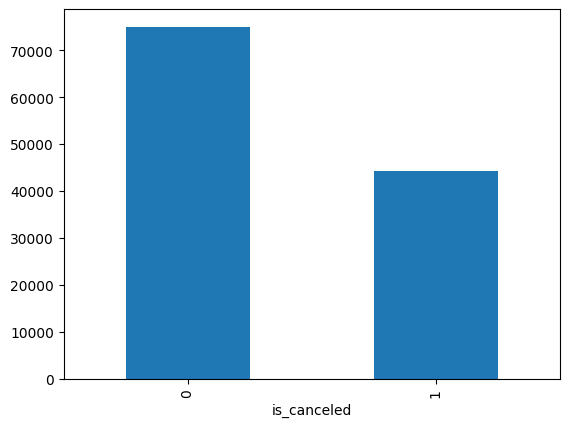

In [5]:
# Plot cancellation counts to visualize proportion of not cancelled and cancelled
bookings['is_canceled'].value_counts().plot(kind='bar')

Remember for our binary variables, like `is_canceled`, `1` = true and `0` = false.

In [6]:
# Let's get an exact percentage of not cancelled and cancelled
(bookings['is_canceled'].value_counts()/bookings['is_canceled'].count())*100

is_canceled
0    62.923412
1    37.076588
Name: count, dtype: float64

In [7]:
# Compute correlation matrix 
bookings.corr()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.292876,0.008315,-0.005948,0.011179,-0.001323,0.025542,0.058182,0.004862,-0.032569,...,-0.001672,0.005436,-0.000550,-0.477957,0.481507,-0.011345,-0.023690,-0.038842,0.133235,-0.124271
lead_time,0.292876,1.000000,0.127046,0.002306,0.131603,0.085985,0.166892,0.117575,-0.037886,-0.021003,...,-0.029744,-0.017132,-0.006911,-0.380173,0.380120,0.016564,0.068627,-0.031759,-0.174030,0.159538
arrival_date_week_number,0.008315,0.127046,1.000000,0.066572,0.995101,0.018629,0.016047,0.026567,0.005559,0.010417,...,-0.002047,0.005354,0.001393,-0.005903,0.007831,-0.016901,0.090342,0.011246,-0.079507,0.042228
arrival_date_day_of_month,-0.005948,0.002306,0.066572,1.000000,-0.026335,-0.016225,-0.028362,-0.001754,0.014541,-0.000235,...,0.004861,0.002873,-0.004012,0.005003,-0.008643,0.032171,-0.012178,-0.001704,-0.000426,0.006168
arrival_date_month,0.011179,0.131603,0.995101,-0.026335,1.000000,0.018851,0.019739,0.029239,0.005483,0.010193,...,-0.001879,0.005222,0.001794,-0.006471,0.008809,-0.020520,0.091687,0.011457,-0.079496,0.041581
stays_in_weekend_nights,-0.001323,0.085985,0.018629,-0.016225,0.018851,1.000000,0.494175,0.094759,0.046134,0.018607,...,0.036697,0.012479,-0.005421,0.113828,-0.114571,0.001789,0.102708,-0.007566,0.020028,-0.065740
stays_in_week_nights,0.025542,0.166892,0.016047,-0.028362,0.019739,0.494175,1.000000,0.096214,0.044651,0.020373,...,0.041310,0.016107,-0.005607,0.079174,-0.080321,0.006857,0.134339,-0.016898,0.007839,-0.065311
adults,0.058182,0.117575,0.026567,-0.001754,0.029239,0.094759,0.096214,1.000000,0.029416,0.017890,...,0.051264,0.105558,0.003792,0.030537,-0.031030,0.003091,0.020339,0.060427,0.091906,-0.116878
children,0.004862,-0.037886,0.005559,0.014541,0.005483,0.046134,0.044651,0.029416,1.000000,0.023999,...,0.392982,0.156345,-0.001851,0.097132,-0.096833,-0.006769,-0.018143,-0.006600,0.096220,-0.092929
babies,-0.032569,-0.021003,0.010417,-0.000235,0.010193,0.018607,0.020373,0.017890,0.023999,1.000000,...,0.031676,0.005121,-0.000579,0.030677,-0.030484,-0.003012,-0.000197,0.000535,0.021613,-0.022945


In [8]:
# Which features are most correlated with `is_cancelled`?
bookings.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
deposit_type_Non_Refund           0.481507
lead_time                         0.292876
market_segment_Groups             0.221990
distribution_channel_TA_TO        0.176005
hotel_City                        0.137082
customer_type_Transient           0.133235
previous_cancellations            0.110139
booked_by_agent                   0.102218
reserved_room_type_A              0.069117
adults                            0.058182
avg_daily_rate                    0.046492
meal_FB                           0.038790
stays_in_week_nights              0.025542
meal_BB                           0.012786
arrival_date_month                0.011179
arrival_date_week_number          0.008315
distribution_channel_Undefined    0.005755
reserved_room_type_H              0.005436
market_segment_Undefined          0.005336
children                          0.004862
reserved_room_type_L             -0.000550
stays_in_weekend_nights          -0.001323
reserved_ro

Be cautious, correlation does not equal feature importance! Correlation may not neccesarily help differentiate classes. Also, the Pearson coefficient only considers **linear** relationships and some of these variables are binary.

### **Splitting data**
Let's split our label and features so we can get to building models! The first column is our label `is_cancelled`, the rest are features.

In [9]:
# Define X and y
X, y = bookings.iloc[:,1:], bookings.iloc[:,0]

## **2. Your First XGBoost Classifier**

XGBoost has a  [scikit-learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn), which is useful if you want to use different scikit-learn classes and methods on an XGBoost model (e.g.,`predict()`, `fit()`).  In this section, we'll try the API out with the `xgboost.XGBClassifier()` class and get a baseline accuracy for the rest of our work. 

As a reminder, gradient boosting sequentially trains weak learners where each weak learner tries to correct its precedessor's mistakes.  We want our weak learners, or boosters, to be decision trees, so we'll explicitly define our booster to be `gbtree`. So that our results are reproducible, we'll set the `random_state=123`.

First we'll instantiate a simple XGBoost classifier without changing any of the other paremeters and we'll inspect the parameters that we haven't touched.

In [10]:
from sklearn.model_selection import train_test_split

# Train and test split using sklearn
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=123)

# Instatiate a XGBClassifier with gbtree as the booster 
xgb_clf = xgb.XGBClassifier(booster="gbtree", random_state=123)

# Inspect the parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [11]:
## Set n_estimator and max_depth
xgb_clf.set_params(max_depth=3, n_estimators=10)

# Fit it to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

For this problem, we are going to use **accuracy** as our metric, since we only have two classes and the smallest class takes ~37% of the data. To calculate accuracy we need to count the correctly predicted data points and divide by the total number of data points.

In [12]:
# Calculate the accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.8061006609049314


In [13]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

0.8061006609049314
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     24804
           1       0.84      0.59      0.69     14536

    accuracy                           0.81     39340
   macro avg       0.82      0.76      0.78     39340
weighted avg       0.81      0.81      0.80     39340



### **Visualizing your tree**

`XGBoost` has two handy visualization functions for interpreting results.

The first is `plot_importance()`  which plots feature importance, meaning, how predictive each feature is for the target variable. It takes in the fitted XGBoost model fitted and the subplot axis in the `ax` argument.


#### **Plotting feature importance**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

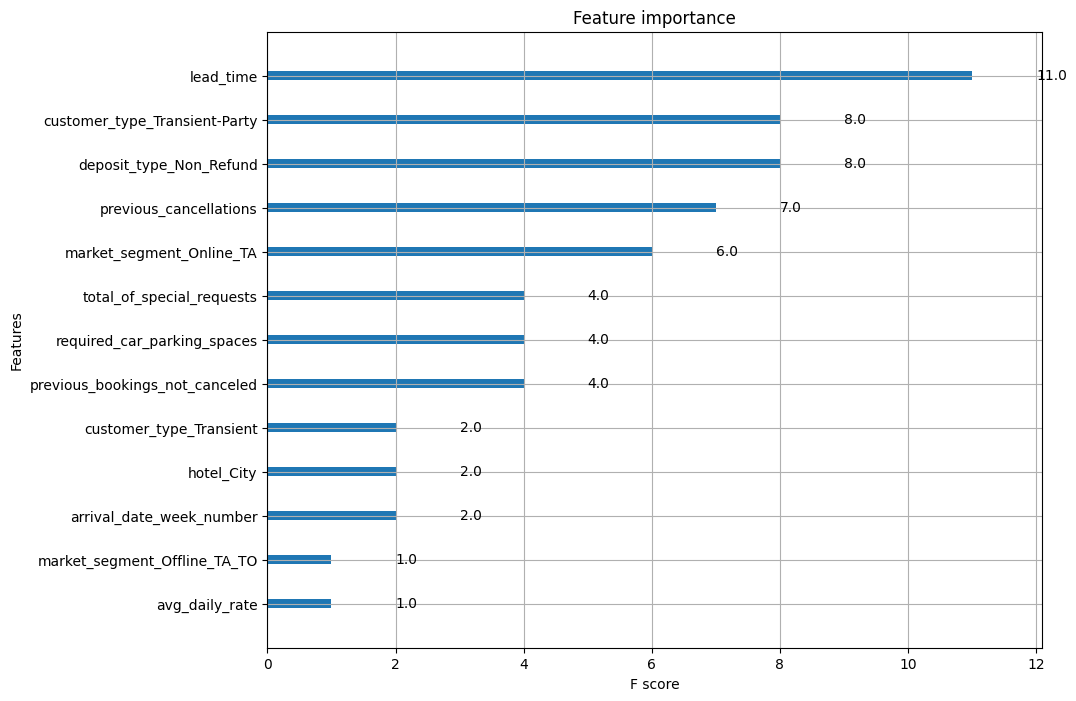

In [14]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

xgb.plot_importance(xgb_clf)

How is importance calculated? Here's an excerpt from the [documentation](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.plotting):

> **importance_type (str, default "weight") –**
> How the importance is calculated: either “weight”, “gain”, or “cover”
> - ”weight” is the number of times a feature appears in a tree
> - ”gain” is the average gain of splits which use the feature
> - ”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

We'll focus on the first two. Gain is way to quantify how much a feature contributes to improving accuracy. Let's try out `gain` to see how it differs from `weight`.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

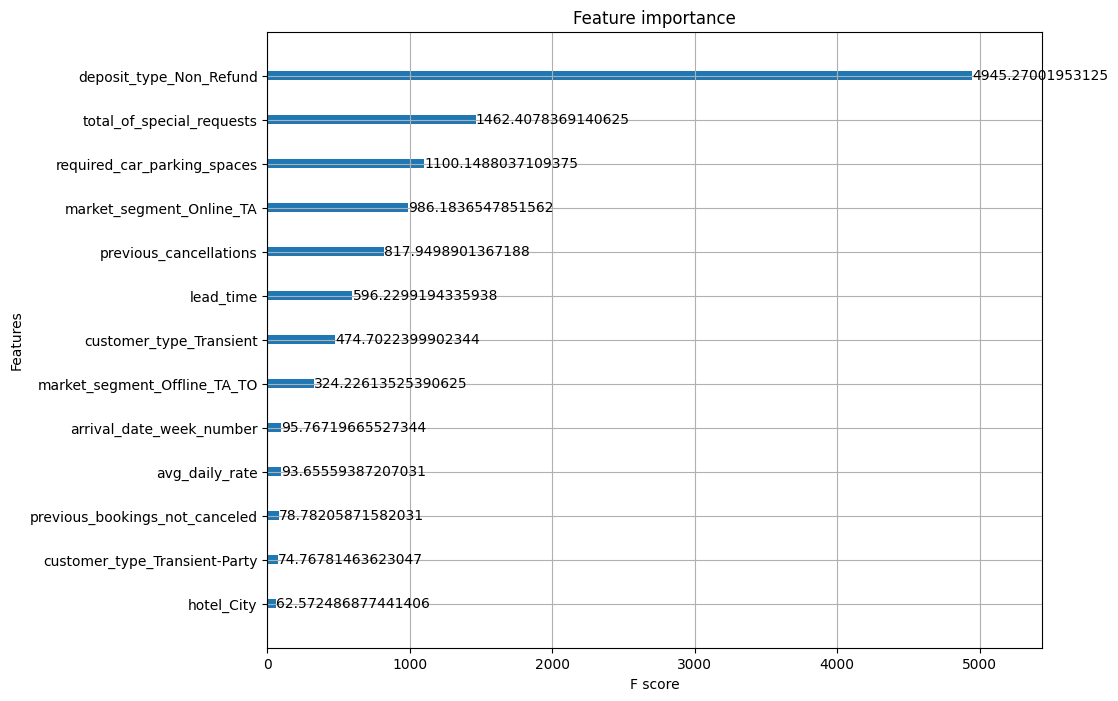

In [15]:
# Plot gain instead of weight
xgb.plot_importance(xgb_clf, importance_type="gain")

Here we see the ordering of features differs quite a bit between `gain` and `weight`! This implies that (1) feature importance can be subjective and (2) the number of appearances a feature has on a tree is not necessarily correlated to how much gain it brings. For example, a binary variable has less of a chance to appear as many times as a continuous variable on a tree, since there are only two outputs. However, it can still can be a powerful feature.

#### **Plotting a decision tree from your model**

The second handy visualization function is`plot_tree()` which visually generates a decision tree in your model. It takes in the fitted XGBoost model and with the `num_trees` parameter you can indicate which tree you want to see. For example, if I have `n_estimator=3`, I can set the parameter as `0`, `1`, or `2` to see either the first, second, or third tree.

<Axes: >

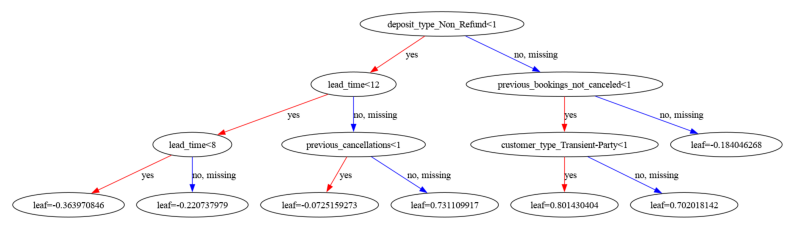

In [16]:
# Plot the first tree
xgb.plot_tree(xgb_clf, num_trees=0)

Check out a higher resolution version of the tree [here](https://github.com/datacamp/Machine-Learning-With-XGboost-live-training/blob/master/assets/tree1.png?raw=true).

There's a parameter called `rankdir`. We can set it to `LR` so the decision builds left to right, as opposed to top to bottom.

<Axes: >

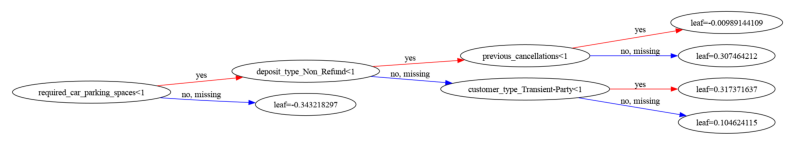

In [17]:
# Plot the last tree
xgb.plot_tree(xgb_clf, num_trees=9, rankdir='LR')

Check out a higher resolution version of the tree [here](https://github.com/datacamp/Machine-Learning-With-XGboost-live-training/blob/master/assets/tree2.png?raw=true).

## **3. Cross Validation in XGBoost**

Cross validation is considered best practice for assessing a model's performance. We can use `xgboost.cv()` to efficiently run cross validation on XGBoost models. This method is part of XGBoost's core library and **not** part of XGBoost's scikit-learn API from earlier. 

<img style="float: center; width:75%" src="https://github.com/datacamp/Machine-Learning-With-XGboost-live-training/blob/master/assets/cv.png?raw=true"> 

### **Converting to DMartix**

DMatrix is XGBoost's internal data structure designed to optimize for both memory efficiency and training speed. It's one of the reason XGBoost achieves performance and efficiency gains over other implementations of gradient boostng.

In the previous exercise, the inputed datasets were converted into DMatrix data when we fit the data with `.fit()`. However, to use the `xgboost.cv()` object, we need to first explicitly convert the data into a `DMatrix`.

In [18]:
# Convert X and y into a DMatrix
bookings_dmatrix = xgb.DMatrix(data=X,label=y)

### **Cross validation with xgb.cv**

Note: Scikit-learn uses `n_estimator` to refer to the number of boosting rounds or number of gradient boosted trees. In XGBoost, it's referred to as `num_boost_rounds`.

To define the booster parameters, it's common practice to create a dictionary to hold all the parameters related to the individual boosters. We'll do this and define the objective functions to be `binary:logistic` and the maximum tree depth to be `3`.

In [19]:
# Define booster parameters using a dictionary
params = {"objective":"binary:logistic", 'max_depth': 3}

# Instantiate a CV object with 3 folds and 10 boosting rounds
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=10, seed=123, metrics=["error"])

# Inspect the results: how are they stored?
xgb_cv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.238667,0.006745,0.239552,0.009779
1,0.233072,0.001330,0.233059,0.000903
2,0.233235,0.000955,0.233235,0.001217
3,0.233198,0.000752,0.233160,0.001495
4,0.232321,0.001424,0.232455,0.000993
5,0.232468,0.001139,0.232506,0.001140
6,0.192777,0.000860,0.192996,0.001304
7,0.189913,0.003105,0.190596,0.001231
8,0.191209,0.002874,0.191972,0.002059
9,0.191192,0.001752,0.191569,0.001774


#### **Results in XGBoost**

There are 10 rows for our 10 boosting rows.

`error` as defined by [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters):
> Binary classification error rate. It is calculated as `#(wrong cases)/#(all cases)`. For the predictions, the evaluation will regard the instances with prediction value larger than 0.5 as positive instances, and the others as negative instances.

This means we need to subtract the last boosting round's `test-error-mean` from 1 to get the accurac.

In [20]:
# Get the result from last boosting round
results = xgb_cv.tail(1)

# Caclulate accuracy
accuracy= 1 - xgb_cv["test-error-mean"].iloc[-1]

# Print the baseline accuracy
print("baseline accuracy:", accuracy)

baseline accuracy: 0.8084305120289114


This is very close to our `xgboost.XGBClassifier()` baseline which used the same booster parameters. This helps validate its performance. Let's now look into improving performace.

### **More trees with early stopping**

We've been using 10 trees (aka `num_boost_rounds`). Let's add more trees (40 instead of 10), but make sure to add **early stopping**. 

Early stopping works by testing the model after every boosting round against the holdout set and if the holdout metric (error in our case) has not improved after a given number of rounds (defined by `early_stopping_rounds`), then any additional boosting rounds are stopped. If the model continuously improves up to `num_boost_round`, then early stopping does not occur.

This helps automatically select the number of boosting rounds and minimize unnecessary training time.

In [21]:
# Increase the number of trees to 40 and set the early stopping rounds to 10
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3,
                    num_boost_round=40,early_stopping_rounds=10, seed=123, metrics=["error"])

# Caclulate accuracy
accuracy= 1 - xgb_cv["test-error-mean"].iloc[-1]

# Print the accuracy
print("accuracy:", accuracy)

accuracy: 0.8156027181483166


In [22]:
# Did early stopping happen?
xgb_cv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.238667,0.006745,0.239552,0.009779
1,0.233072,0.001330,0.233059,0.000903
2,0.233235,0.000955,0.233235,0.001217
3,0.233198,0.000752,0.233160,0.001495
4,0.232321,0.001424,0.232455,0.000993
5,0.232468,0.001139,0.232506,0.001140
6,0.192777,0.000860,0.192996,0.001304
7,0.189913,0.003105,0.190596,0.001231
8,0.191209,0.002874,0.191972,0.002059
9,0.191192,0.001752,0.191569,0.001774


There are 40 rows and the test error seems to have decreased almost continuously after each round. This means early stopping did not happen because our model kept improving.

We've improved the results by increasing the number of boosted trees, but there are more parameters we can play with!

## **4. Digging into Parameters**

Along with setting the number of boosting rounds and early stopping rounds, there are many other parameters for our tree booster. We can see this in the documentation for [parameters for tree booster](https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster).

In this section, we'll take a look at several important parameters and get an understanding of what they do.

For the purpose of this session, we'll use `XGBClassifier()` with 25 boosting rounds to avoid long training times. 

In [23]:
from sklearn.metrics import accuracy_score

# Instantiate the XGBClassifier with 25 boosting rounds
xgb_clf = xgb.XGBClassifier(n_estimators=25, random_state=123)

### **Max depth**

_From XGBoost docs:_
> Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

Let's see what happens when we increase the max_depth from 3 to 6.

In [24]:
# set max_depth to 6
xgb_clf.set_params(max_depth=6)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8224199288256228

### **colsample_bytree**

_From XGBoost docs:_

> The subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

Essentially, this lets us limit the number of columns used when constructing each tree. This adds randomness, making the model more robust to noise. The default is 1 (i.e. all the columns), let's try a smaller value.

In [25]:
# set colsample_bytree to 0.5 and print accuracy
xgb_clf.set_params(colsample_bytree=0.5)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8230045754956787

We can also limit the number of columns used by every depth level or node of our tree.

_From XGBoost docs:_

> `colsample_bylevel` is the subsample ratio of columns for each level. Subsampling occurs once for every new depth level reached in a tree. Columns are subsampled from the set of columns chosen for the current tree.

> `colsample_bynode` is the subsample ratio of columns for each node (split). Subsampling occurs once every time a new split is evaluated. Columns are subsampled from the set of columns chosen for the current level.

### **subsample**

_From XGBoost docs:_

> - Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees and this will prevent overfitting. 
> - Subsampling will occur once in every boosting iteration.
> - range: (0,1]

Default is 1, let's try 0.75. 

This means each of our 10 trees will get a random sampling of 75% of our training data. This means that each tree will train on different portions of data and adds randomness (similar to `colsample_bytree`). However, we don't want this too low if we don't have many trees, because our model will underfit from not seeing as much data.

In [26]:
# set subsample to 0.75 and print accuracy
xgb_clf.set_params(subsample=0.75)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8237925775292323

### **min_child_weight**

_From XGBoost docs:_

> - Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. 
> - The larger min_child_weight is, the more conservative the algorithm will be.
> - range: [0,∞]


Let's increase `min_child_weight`. This will decrease model complexity.

In [27]:
# set min_child_weight to 1.5 and print accuracy
xgb_clf.set_params(min_child_weight=1.5)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8235383833248602

### **gamma**

_From XGBoost docs:_
> - Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
> - range: [0,∞]

Default is 0. Let's increase it.

In [28]:
# set gamma to .25 and print accuracy
xgb_clf.set_params(gamma=0.25)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8232587697000509

### **alpha**

_From XGBoost docs:_
> L1 regularization term on weights. Increasing this value will make model more conservative.

Default is 0.

In [29]:
# set alpha to .1 and print accuracy
xgb_clf.set_params(reg_alpha=0.01)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8232587697000509

L2 is also available with `reg_lambda`.

### **Learning Rate (aka eta)**

_From XGBoost docs:_
> - Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
> - range: [0,1]

Default is 0.30. What happens if we decrease it?

In [30]:
# set learning rate to .1 and print accuracy
xgb_clf.set_params(learning_rate=0.1)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8161667513980682

In [31]:
# Print the model parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.25,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': 1.5,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 25,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': 0.01,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.75,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

There are a lot of possible parameters combinations. We can't manually tune and pick them.

## **5. Hyperparameter tuning with Random Search**

Grid search and random search are the most popular methods for hyperparameter tuning. However, grid search can get computationally expensive if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. In this last section, this is why we'll use random search because not all hyperparemeter values are tried. In random search, a fixed number of hyperparameter settings is sampled from specified probability distributions.

XGBoost doesn't have a built-in gridsearch function, so we need to use `scikit-learn`'s [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). This means we'll have to use `XGBClassifier()` because it's `scikit-learn` compatible.

In [32]:
from sklearn.model_selection import RandomizedSearchCV


# Create a parameter grid for three parameters
## max_depth: values from 2 to 12
## alpha: values 0, .001, .01, .1
## subsample: values 0.25,0.5,0.75, 1
## min_child_weight: values 1, 1.5, 2
rs_param_grid = {
    'max_depth': list((range(2,12))),
    'alpha': [0,0.001, 0.01,0.1,1],
    'subsample': [0.5,0.75,1],
    'min_child_weight': [1,1.5,2]
}

# instantiate a new XGBClassifier()
## Let's keep at n_estimator to 20 to keep computation time low(er)
xgb_clf = xgb.XGBClassifier(n_estimators=20, random_state=123)

# Instantiate RandomizedSearchCV()
## For random search, we use param_distributions instead of params
## n_iter: the number of parameter settings that are tried
## verbose: get more output on what's being computers
xgb_rs = RandomizedSearchCV(estimator=xgb_clf,param_distributions=rs_param_grid, 
                                cv=3, n_iter=5, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs.fit(X_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END alpha=0, max_depth=7, min_child_weight=1.5, subsample=0.75; total time=   0.3s
[CV] END alpha=0, max_depth=7, min_child_weight=1.5, subsample=0.75; total time=   0.4s
[CV] END alpha=0, max_depth=7, min_child_weight=1.5, subsample=0.75; total time=   0.4s
[CV] END alpha=0, max_depth=11, min_child_weight=1.5, subsample=0.75; total time=   0.5s
[CV] END alpha=0, max_depth=11, min_child_weight=1.5, subsample=0.75; total time=   0.3s
[CV] END alpha=0, max_depth=11, min_child_weight=1.5, subsample=0.75; total time=   0.4s
[CV] END alpha=0, max_depth=5, min_child_weight=2, subsample=0.75; total time=   0.3s
[CV] END alpha=0, max_depth=5, min_child_weight=2, subsample=0.75; total time=   0.3s
[CV] END alpha=0, max_depth=5, min_child_weight=2, subsample=0.75; total time=   0.3s
[CV] END alpha=0.01, max_depth=7, min_child_weight=1, subsample=1; total time=   0.3s
[CV] END alpha=0.01, max_depth=7, min_child_weight=1, subsample=1

## **Take home assignment**

The above code takes about ~3 minutes to run and reaches an accuracy of ~0.8403 on the training data (`X_train`,`y_train`).

With less time restrictions at home, what is the highest accuracy you can reach on the test set (`X_test`,`y_test`)? Make sure to play around with the parameters and their values in `rs_param_grid`.